## Replicating non-linear activate functions

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

In [2]:
x, y = make_blobs(n_samples=1000, centers=4, cluster_std=2, random_state=42)


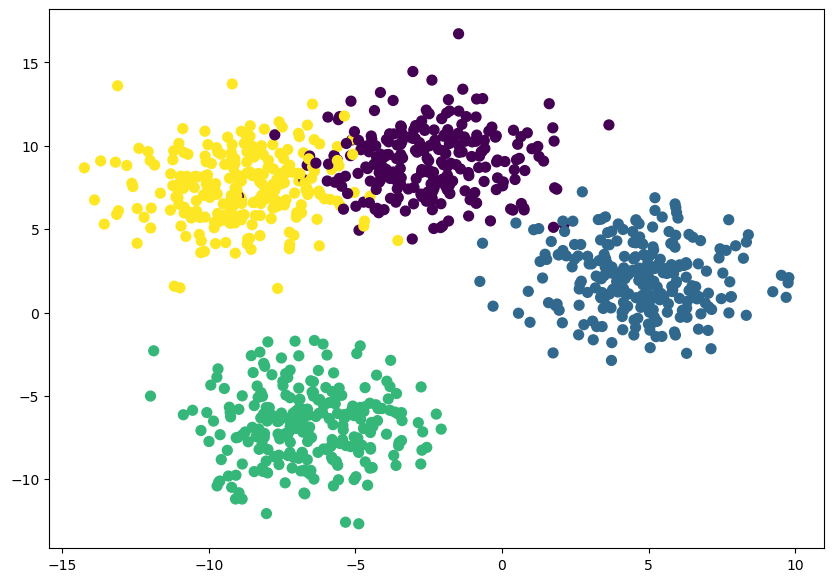

In [3]:
plt.figure(figsize=(10, 7))
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='viridis');

In [5]:
import torch
from torch import nn

In [6]:
X = torch.from_numpy(x).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)




In [13]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

##  Building a multi-class classification model in pytorch

In [8]:
# create device to cuda

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Today task to build a model to with non-linear without using `ReLU` Activation function

## Building a model for multi-liner classification with pytorch

In [23]:
# Building a model for multi-classification 

class blobmodel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer(x)
    

model = blobmodel(input_features=2, output_features=4, hidden_units=8).to(device)
print(model)

blobmodel(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)


### Create a loss function and optimizer for a multi-classification model